In [18]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


In [11]:
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  # for different scales
Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_0 = np.random.uniform(-2, 2, (n_features))

In [24]:
dt = pd.DataFrame(data=X)

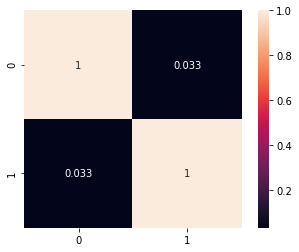

In [30]:
sns.heatmap(dt.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})

In [35]:

# в этих переменных будут лежать веса, которые мы оценим
# W - веса модели, на которые умножаются признаки
W = None
# b - bias, который добавляется к итоговому результату
b = None
def mse(preds, y):
    """
    Возвращает среднеквадратичную ошибку между preds и y.
    """
    return ((preds - y)**2).mean()

def solve_weights(X, y):
    """
    Находит параметры W,b по методу наименьших квадратов для X и y.
    Решает систему линейных уравнений, к которым приводит метод наименьших 
    квадратов, для признаков X и значений y.
    """
    # ключевое слово global позволяет нам использовать глобальные переменные,
    # определенные в начале ячейки
    global W, b
    
    
    N = X.shape[0]
    # добавляем к признакам фиктивную размерность, чтобы было удобнее находить bias
    bias = np.ones((N, 1))
    X_b = np.append(bias, X, axis=1)
    
    # используем формулу из метода наименьших квадратов
    # W_full сожержит коэффициенты W и b, так как мы добавили фиктивную размерность к признакам
    W_full = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    
    # мы разделяем bias, который лежал в начале вектора W_full, и веса модели W
    W = W_full[1:]
    b = np.array([W_full[0]])
    # нам не нужно возвращать W и b, так как они уже лежат в глобальных переменных
    
def grad_descent(X, y, lr, num_iter=100):
    """
    Находит приближенные значения параметров модели, используя градиентный спуск.
    Функции потерь (ошибки) для данной реализации спуска - сумма квадратов ошибки.
    Возвращаемое значение - список значений ффункции потерь на каждом шаге.
    """
    # ключевое слово global позволяет нам использовать глобальные переменные,
    # определенные в начале ячейки
    global W, b
    W = np.random.rand(X.shape[1])
    b = np.array(np.random.rand(1))
    
    losses = []
    
    N = X.shape[0]
    for iter_num in range(num_iter):
        preds = predict(X)
        losses.append(mse(preds, y))
        
        w_grad = np.zeros_like(W)
        b_grad = 0
        for sample, prediction, label in zip(X, preds, y):
            w_grad += 2 * (prediction - label) * sample
            b_grad += 2 * (prediction - label)
            
        W -= lr * w_grad
        b -= lr * b_grad
    return losses

def predict(X):
    """
    Предсказывает значения y, используя текущие параметры модели W и b
    """
    global W, b
    return np.squeeze(X@W + b.reshape(-1, 1))

In [36]:

def generate_data(range_, a, b, std, num_points=100):
    """Генерирует данные в заданном промежутке, которые подчиняются зависимости y = a*x + b + е,
    где е - нормально распределено со стандартным отклонением std и нулевым средним."""
    X_train = np.random.random(num_points) * (range_[1] - range_[0]) + range_[0]
    y_train = a * X_train + b + np.random.normal(0, std, size=X_train.shape)
    
    return X_train, y_train

In [37]:
# Зададим параметры для искусственных данных
real_a = 0.34
real_b = 13.7
real_std = 7

# Генерируем данные для промежутка от 0 до 150 с параметрами, которые мы задали выше
X_train, y_train = generate_data([0, 150], real_a, real_b, real_std)

# просто выведем табличку с данными
pd.DataFrame({'X': X_train, 'Y': y_train}).head()

,X,Y
0,116.517070,49.667015
1,70.515429,33.519039
2,62.655363,40.755622
3,147.481677,63.714018
4,33.975175,31.004042


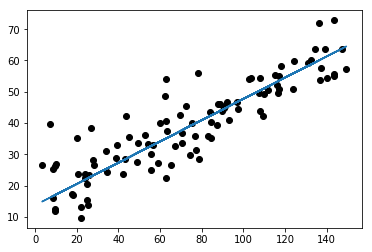

In [38]:
plt.scatter(X_train, y_train, c='black')
plt.plot(X_train, 0.34*X_train+13.7)
plt.show()

In [39]:
solve_weights(X_train.reshape(-1, 1), y_train)

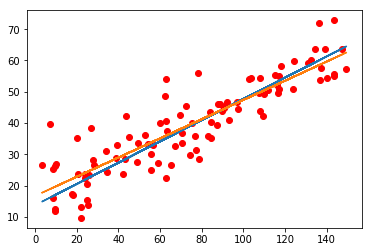

In [40]:

# Выведем данные, истинную зависимость и полученную нами с помощью метода наименьших квадратов
plt.scatter(X_train, y_train, c='r')
plt.plot(X_train, 0.34*X_train+13.7)
plt.plot(X_train, np.squeeze(X_train.reshape(-1, 1) @ W + b.reshape(-1, 1)))
plt.show()

In [41]:

# Найдем параметры с помощью градиентного спуска
# чтобы проследить за обучением, мы записываем значение функции ошибки на каждом шаге и после выводим
losses = grad_descent(X_train.reshape(-1, 1), y_train, 1e-9, 15000)

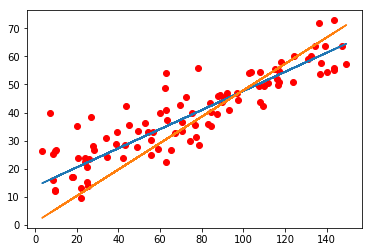

In [42]:
# Выведем данные, истинную зависимость и полученную нами
plt.scatter(X_train, y_train, c='r')
plt.plot(X_train, real_a * X_train + real_b)
plt.plot(X_train, np.squeeze(X_train.reshape(-1, 1) @ W + b.reshape(-1, 1)))
plt.show()